In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from sklearn.metrics import confusion_matrix

import seaborn as sns


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import cv2

In [8]:
#for cv2
!pip install opencv-python

In [2]:
path_to_model = "vgg16_customized.h5"
model = tf.keras.models.load_model(path_to_model)


In [3]:
batch_size = 64
IMG_SIZE = (224, 224) #specific for VGG16
IMG_SHAPE = IMG_SIZE + (3,)


data_dir_test_balanced = os.path.join('dataset_final', 'TEST_BALANCED')
test_data_balanced = tf.keras.utils.image_dataset_from_directory(
  data_dir_test_balanced,
  image_size= IMG_SIZE,
  seed=1,
  batch_size= batch_size)


data_dir_test_unbalanced = os.path.join('dataset_final', 'TEST_UNBALANCED')
test_data_unbalanced = tf.keras.utils.image_dataset_from_directory(
  data_dir_test_unbalanced,
  image_size= IMG_SIZE,
  seed=1,
  batch_size= batch_size)

Found 796 files belonging to 4 classes.
Found 199 files belonging to 4 classes.


In [7]:
score = model.evaluate(test_data_balanced, verbose=False)
print('Test accuracy:', score[1])

Test accuracy: 0.643216073513031


In [10]:
score = model.evaluate(test_data_unbalanced, verbose=False)
print('Test accuracy:', score[1])

Test accuracy: 0.6080402135848999


In [4]:
def get_predictions_and_true_labels(test_data, model):
    """
    @inputs : test_data : the set you want the prediction
    WARNING : in this fuction, test_data must have the same form as the output of 
                tf.keras.utils.image_dataset_from_directory
              model : architecture used for the prediction
                
    @outpus : predictions and true labels 
    """
    predictions = np.array([])
    true_labels =  np.array([])
    for x, y in test_data: 
        predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=1)])
        true_labels = np.concatenate([true_labels, y.numpy()])
    return predictions, true_labels

In [5]:
predictions, true_labels = get_predictions_and_true_labels(test_data_balanced, model)

In [11]:
def show_confusion_matrix(predictions, true_labels):
    conf_mat = confusion_matrix(true_labels, predictions)
    map_period = { "Antiquity":0., "Contemporary_Era":1., "Middle_Ages":2.,"Modern_Times": 3.}
    plt.figure(figsize=(8,8))
    sns.heatmap(conf_mat, cmap="Blues",
    annot=True, xticklabels=map_period.keys(),
    yticklabels=map_period.keys(),
    fmt="d")

    plt.xlabel("Predicted class")
    plt.ylabel("True class")
    plt.show()

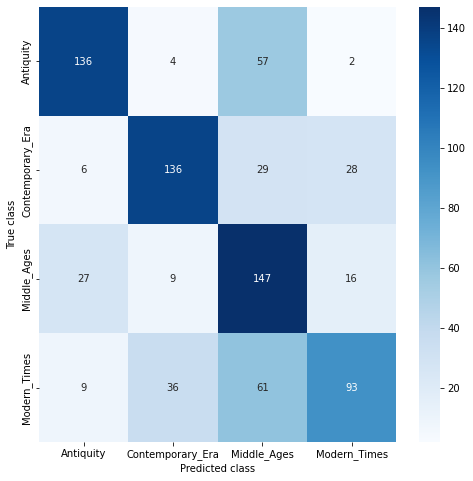

In [12]:
show_confusion_matrix(predictions, true_labels)

In [17]:
def predict_single_image(image_path,model, class_names, image_size):
    
    """
  @inputs : image_path : the path to the image we want to predict the class
            model : architecture used for the prediction
            class_names : the name of the 4 classes
  
  @output : show the image and give the class predicted by the model

    """
    
    #import the image and resize it for the model
    image_to_predict = cv2.imread(image_path,cv2.IMREAD_COLOR)
    img_to_predict = np.expand_dims(cv2.resize(image_to_predict, image_size), axis=0) 
    
    #prediction of the class by the model
    res = np.argmax(model.predict(img_to_predict), axis=1)
    prediction = class_names[res[0]] #to have the name of the class instead of a number
    
    plt.imshow(cv2.cvtColor(image_to_predict, cv2.COLOR_BGR2RGB))
    plt.title(f'prediction : {prediction}')
    plt.show()
    
    

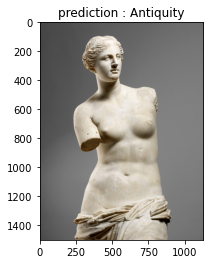

In [18]:
class_names = ['Antiquity', 'Contemporary_Era', 'Middle_Ages', 'Modern_Times']
image_path = 'louvre2.jpg'

predict_single_image(image_path,model, class_names, image_size=IMG_SIZE)